In [1]:
import sys
import os

# 프로젝트 루트 추가 (노트북이 있는 디렉토리)
project_root = os.path.dirname(os.path.abspath("__file__")) if "__file__" in globals() else os.getcwd()
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
from workflow.rag_agent_workflow_part1 import app_part1, AgentState
from workflow.classes import create_initial_state

from test.test_data_loader import test_data_loader_v1

# task_id = "session-20251002-052932-151e52e9" # 10만개 데이터
task_id = "session-20251002-040520-28a9dc6c" # 정호주임 pc
# task_id = "session-20250930-133411-99e3becc"
# task_id = "session-20251001-151642-1ff9e24a"
job_id = "test+job_id"

print("🔄 아티팩트 생성 중...")
artifacts = test_data_loader_v1(task_id, months=12)

print(f"\n✅ 총 {len(artifacts):,}개 아티팩트 로드 완료")

g:\s_dev\unknown\generator\generator\.venv\Lib\site-packages\pydantic\_internal\_generate_schema.py:937: UserWarning: Mixing V1 models and V2 models (or constructs, like `TypeAdapter`) is not supported. Please upgrade `Settings` to V2.
  warnings.warn(
g:\s_dev\unknown\generator\generator\.venv\Lib\site-packages\pydantic\_internal\_generate_schema.py:937: UserWarning: Mixing V1 models and V2 models (or constructs, like `TypeAdapter`) is not supported. Please upgrade `Settings` to V2.
  warnings.warn(


✅ Graph compiled successfully!
✅ Part 1 Graph compiled successfully (데이터 로딩 및 저장)!
🔄 아티팩트 생성 중...
2025-10-20 22:12:55,225 - test.testAnalyzer - INFO - 🚀 [TEST] Starting filtering test for task: session-20251002-040520-28a9dc6c
2025-10-20 22:12:55,226 - DevAnaly - DEBUG - Starting data load for category: BROWSER
[2025-10-20 22:12:55] DataEncoder - Converted WebKit urls.last_visit_time to datetime
[2025-10-20 22:12:55] DataEncoder - Converted WebKit visits.visit_time to datetime
[2025-10-20 22:12:55] DataEncoder - Converted WebKit downloads.start_time to datetime
[2025-10-20 22:12:55] DataEncoder - Converted WebKit downloads.end_time to datetime
[2025-10-20 22:12:55] DataEncoder - Converted WebKit downloads.last_access_time to datetime
[2025-10-20 22:12:55] DataEncoder - Converted WebKit logins.date_created to datetime
[2025-10-20 22:12:55] DataEncoder - Converted WebKit logins.date_last_used to datetime
[2025-10-20 22:12:55] DataEncoder - Converted WebKit logins.date_received to datetim

2025-10-20 22:12:56,844 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): mermaid.ink:443
2025-10-20 22:12:57,787 - urllib3.connectionpool - DEBUG - https://mermaid.ink:443 "GET /img/LS0tCmNvbmZpZzoKICBmbG93Y2hhcnQ6CiAgICBjdXJ2ZTogbGluZWFyCi0tLQpncmFwaCBURDsKCV9fc3RhcnRfXyhbPHA+X19zdGFydF9fPC9wPl0pOjo6Zmlyc3QKCWZpbHRlcl9hcnRpZmFjdHMoZmlsdGVyX2FydGlmYWN0cykKCWV4dHJhY3RfcmVzdWx0cyhleHRyYWN0X3Jlc3VsdHMpCglzYXZlX2RhdGEoc2F2ZV9kYXRhKQoJX19lbmRfXyhbPHA+X19lbmRfXzwvcD5dKTo6Omxhc3QKCV9fc3RhcnRfXyAtLT4gZmlsdGVyX2FydGlmYWN0czsKCWV4dHJhY3RfcmVzdWx0cyAtLT4gc2F2ZV9kYXRhOwoJZmlsdGVyX2FydGlmYWN0cyAtLiAmbmJzcDtzeW50aGVzaXplJm5ic3A7IC4tPiBleHRyYWN0X3Jlc3VsdHM7CglzYXZlX2RhdGEgLS0+IF9fZW5kX187CglmaWx0ZXJfYXJ0aWZhY3RzIC0uICZuYnNwO2NvbnRpbnVlJm5ic3A7IC4tPiBmaWx0ZXJfYXJ0aWZhY3RzOwoJY2xhc3NEZWYgZGVmYXVsdCBmaWxsOiNmMmYwZmYsbGluZS1oZWlnaHQ6MS4yCgljbGFzc0RlZiBmaXJzdCBmaWxsLW9wYWNpdHk6MAoJY2xhc3NEZWYgbGFzdCBmaWxsOiNiZmI2ZmMK?type=png&bgColor=!white HTTP/1.1" 200 18355


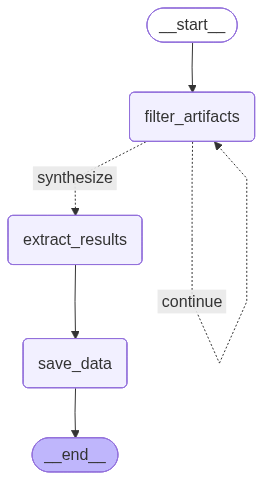

In [3]:
from IPython.display import Image, display
display(Image(app_part1.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
print(f"\n🚀 분석 시작...")

initial_state = create_initial_state(
    job_id=job_id,
    task_id=task_id,
    job_info={},
    artifact_chunks=[artifacts],
    intermediate_results=[],
    filter_iteration=0,
    target_artifact_count=100_000,
    current_strictness="very_strict",
    raw_user_requirements=""
)

import time
from typing import cast
start_time = time.time()

initial_state = cast(AgentState, initial_state)
final_state = app_part1.invoke(initial_state)
elapsed_time = time.time() - start_time

print(f"\n⏱️  총 처리 시간: {elapsed_time:.1f}초 ({elapsed_time/60:.1f}분)")
print(f"🔍 필터링된 중요 아티팩트: {sum(len(r.important_artifacts) for r in final_state['intermediate_results'])}개")



🚀 분석 시작...
2025-10-20 22:12:58,059 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): api.smith.langchain.com:443

🔄 필터링 반복 1/3: VERY_STRICT
  - 입력: 원본 아티팩트
  - 현재 아티팩트: 5,540개
  - 필터링 강도: very_strict
  - 목표 비율: 1.5%
  - 목표 개수: 100,000개
  - 총 청크 수: 19개

📦 총 1개 배치로 처리

📦 배치 1/1 (청크 1-19)...
2025-10-20 22:12:58,523 - urllib3.connectionpool - DEBUG - https://api.smith.langchain.com:443 "GET /info HTTP/1.1" 200 816
2025-10-20 22:12:58,525 - langsmith.client - DEBUG - Tracing control thread func compress parallel called
2025-10-20 22:12:58,625 - langsmith.client - DEBUG - Sending multipart request to https://api.smith.langchain.com with context: trace=378d985e-5115-49b4-9164-964667418012,id=378d985e-5115-49b4-9164-964667418012; trace=378d985e-5115-49b4-9164-964667418012,id=b67b578d-82d1-41c5-8def-8da8ae4a7f9e; trace=ed55dee6-d42a-43ac-a92b-c709b19147f3,id=ed55dee6-d42a-43ac-a92b-c709b19147f3; trace=ed55dee6-d42a-43ac-a92b-c709b19147f3,id=01fe495a-b153-4f90-9a53-9de4ce4d0

2025-10-20 22:14:22,536 - langsmith.client - DEBUG - Sending compressed multipart request with context: trace=378d985e-5115-49b4-9164-964667418012,id=3c09698d-1430-40b1-921b-7bb3bc0d5ed5; trace=378d985e-5115-49b4-9164-964667418012,id=378d985e-5115-49b4-9164-964667418012
2025-10-20 22:14:22,773 - urllib3.connectionpool - DEBUG - https://api.smith.langchain.com:443 "POST /runs/multipart HTTP/1.1" 202 34
